In [1]:
# computation
import numpy as np

# dataframes and realted operations
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import MinMaxScaler

# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# evaluation
from sklearn.metrics import mean_squared_log_error
from scipy.stats import pearsonr


## 1. Importing and looking at the data

In [2]:
train_data = pd.read_csv('train/train.csv')
fulfilment_center_info = pd.read_csv('train/fulfilment_center_info.csv')
meal_info = pd.read_csv('train/meal_info.csv')
test_data = pd.read_csv('test_QoiMO9B.csv.xls')

In [3]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [5]:
train_data.shape

(456548, 9)

In [6]:
train_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [7]:
# No null values present in train_data

### Looking at the test data

In [8]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


### Looking at the fulfilment_center_info df 

In [10]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [11]:
fulfilment_center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [12]:
# No null values present in this df

### Looking at the meal_info df

In [13]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [14]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [15]:
# No null values present in this df either

### 1.1 Merging the train and test seperately with (fulfilment_center_info + meal_info) dataframes

* checking if all values in the "center_id" column in train_data and test_data contains all the values of the "center_id" column in fulfilment_center_info

In [16]:
print(all(item in train_data['center_id'] for item in fulfilment_center_info['center_id']))
print(all(item in test_data['center_id'] for item in fulfilment_center_info['center_id']))

True
True


* we'll also need to merge this new table with the meal_info table, so checking again

In [17]:
# checking if all the meal_id values in the meal_info table are present in our main tables
print(all(item in train_data['meal_id'] for item in meal_info['meal_id']))
print(all(item in test_data['meal_id'] for item in meal_info['meal_id']))

True
True


> Now we know that merging these dataframes won't have any consequences like loss of data in the fulfilment or meal dataframes/tables. 

In [18]:
# shapes before merging

print(train_data.shape)
print(test_data.shape)

(456548, 9)
(32573, 8)


In [19]:
# merging both train and test dataframes seperately with fulfilment_center_info dataframe

train_data = train_data.merge(fulfilment_center_info, on = 'center_id')
test_data = test_data.merge(fulfilment_center_info, on = 'center_id')

In [20]:
# sanity check for merging operation

print(train_data.shape)
print(test_data.shape)

(456548, 13)
(32573, 12)


In [21]:
# merging both train and test dataframes seperately with meal_info dataframe

train_data = train_data.merge(meal_info, on = 'meal_id')
test_data = test_data.merge(meal_info, on = 'meal_id')

In [22]:
# shapes before merging

print(train_data.shape)
print(test_data.shape)

(456548, 15)
(32573, 14)


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   city_code              32573 non-null  int64  
 9   region_code            32573 non-null  int64  
 10  center_type            32573 non-null  object 
 11  op_area                32573 non-null  float64
 12  category               32573 non-null  object 
 13  cuisine                32573 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

## 2. EDA

In [25]:
# CHECKING IF THE ANY NEW CENTERS WERE ADDED IN THE TEST DATA AS IT BELONGS TO AFTER WEEK 145
centers_in_train_data = train_data.center_id.unique()
centers_in_test_data = test_data.center_id.unique()
print("Centers in train = ", len(centers_in_train_data), "\nCenters in test = ",len(centers_in_test_data))
print("*"*50)
print("\nTest contains the same centers as train data: ", all(item in train_data['center_id'] for item in test_data['center_id']))

Centers in train =  77 
Centers in test =  77
**************************************************

Test contains the same centers as train data:  True


In [26]:
# CHECKING IF THE ANY NEW MEALS WERE ADDED IN THE TEST DATA AS IT BELONGS TO AFTER WEEK 145
meals_in_train_data = train_data.meal_id.unique()
meals_in_test_data = test_data.meal_id.unique()
print("Meals in train = ", len(meals_in_train_data), "\nMeals in test = ",len(meals_in_test_data))
print("*"*50)
print("\nTest contains the same meals as train data: ", all(item in train_data['meal_id'] for item in test_data['meal_id']))

Meals in train =  51 
Meals in test =  51
**************************************************

Test contains the same meals as train data:  True


### 2.1 Univariate analysis: center_id 

In [27]:
# weeks_count = dict(train_data.week.value_counts())
# weeks_count = dict(sorted(weeks_count.items()))
# weeks_count

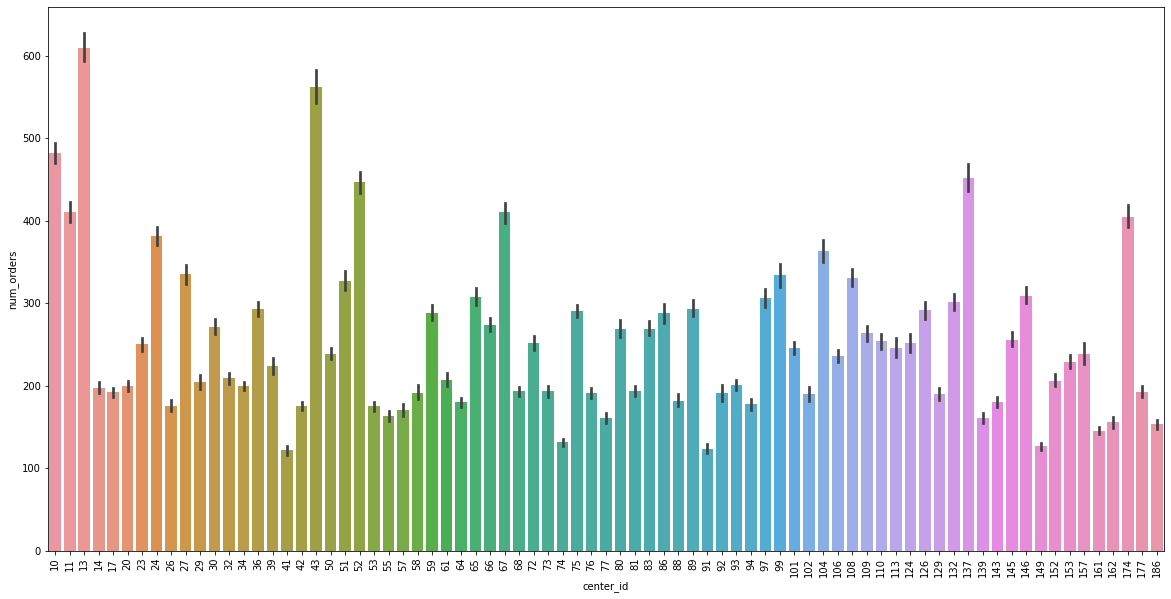

In [28]:
# PLOTTING CENTER_ID VS NUM_ORDERS

plt.figure(figsize = (20,10))
sns.barplot(train_data['center_id'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

> Observation: The center with center_id = 13 is associated with the maximum number of orders

### 2.2 Univariate analysis: meal_id 

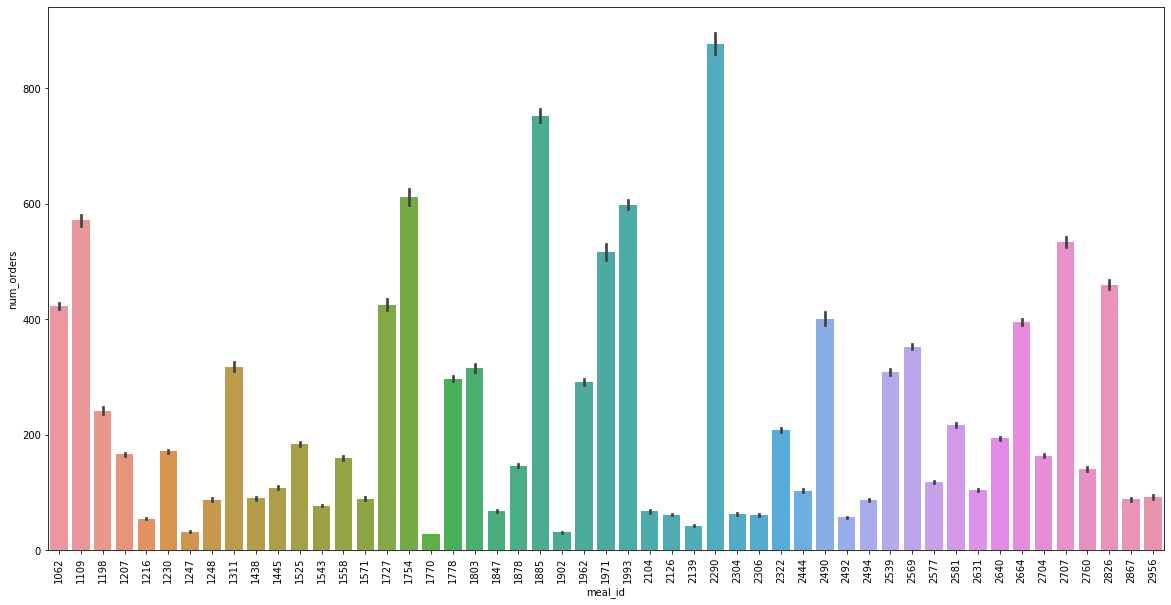

In [29]:
# PLOTTING MEAL_ID VS NUM_ORDERS

plt.figure(figsize = (20,10))
sns.barplot(train_data['meal_id'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

> Observation: The meal with meal_id = 2290 is associated with the maximum number of orders

### 2.3 Analysis: checkout_price, base_price

In [30]:
train_data[['checkout_price', 'base_price']]

,checkout_price,base_price
0,136.83,152.29
1,135.83,152.29
2,132.92,133.92
3,135.86,134.86
4,146.50,147.50
...,...,...
456543,583.03,630.53
456544,581.03,582.03
456545,583.03,581.03
456546,582.03,581.03


#### > Checkout price can be the final price after some operations on base_price like-
* Deduction of discount
* Addition of delivery charges
* etc

> So we'll have to check if base_price and checkout_price are related in some way

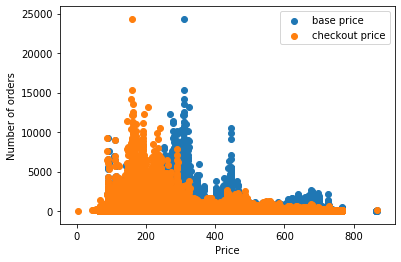

In [31]:
# PLOTTING BOTH THE VARIABLES AGAINST THE TARGET VARIABLE

plt.scatter(train_data['base_price'], train_data['num_orders'], label = 'base price')
plt.scatter(train_data['checkout_price'], train_data['num_orders'], label = 'checkout price')
plt.legend()
plt.ylabel("Number of orders")
plt.xlabel("Price")
plt.show()

> Observations: 
* Both the variables seem to have outliers at the same price values.
* The variance of both the variables seems to be almost same.
* Apart from this, nothing can be said about the relationship between them at the moment.

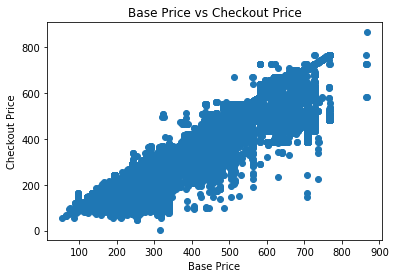

In [32]:
# PLOTTING A SCATTER PLOT OF BOTH THE VARIABLES TO SEE IF SOME REALTIONSHIP CAN BE FOUND

plt.scatter(train_data['base_price'], train_data['checkout_price'])
plt.title("Base Price vs Checkout Price")
plt.xlabel("Base Price")
plt.ylabel("Checkout Price")
plt.show()

> Observations: 
* So the relationship is almost linear with some outliers.
* This implies that we can try out teh following methods to check for correlation -
    * Pearson's correlation coeffecient (assumes a linear relationship) 
    * Spearman's rank correlation coeffecient (isn't biased to linear relationships and is robust to outliers).

In [33]:
# https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

corr, _ = pearsonr(train_data['base_price'], train_data['checkout_price'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.953


* It;s clear that these two featuers/variables are highly correlated. So, I'll be rermoving the base price from the model.

In [34]:
# REMOVING BASE PRICE FROM THE MODEL

print("Shapes before dropping- ")
print(train_data.shape)
print(test_data.shape)
train_data = train_data.drop(columns = 'base_price')
test_data = test_data.drop(columns = 'base_price')

print("Shapes after dropping- ")
print(train_data.shape)
print(test_data.shape)

Shapes before dropping- 
(456548, 15)
(32573, 14)
Shapes after dropping- 
(456548, 14)
(32573, 13)


### 2.4 Univariate analysis: center_type 

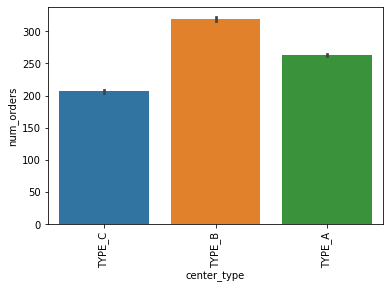

In [35]:
# PLOTTING CENTER_TYPE VS NUM_ORDERS

#plt.figure(figsize = (20,10))
sns.barplot(train_data['center_type'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

### 2.5 Univariate analysis: category 

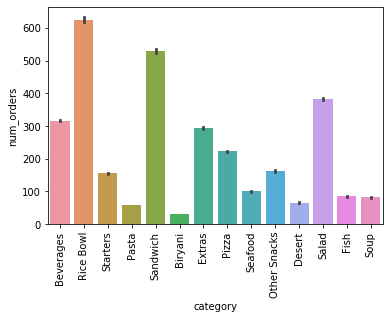

In [36]:
# PLOTTING CATEGORY VS NUM_ORDERS

#plt.figure(figsize = (20,10))
sns.barplot(train_data['category'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

### 2.6 Univariate analysis: cuisine

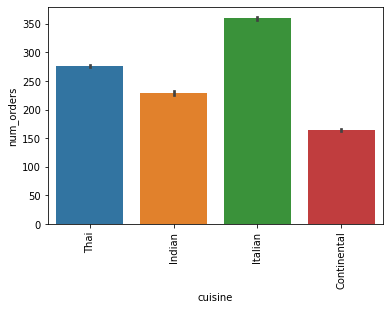

In [37]:
# PLOTTING CUISINE VS NUM_ORDERS

#plt.figure(figsize = (20,10))
sns.barplot(train_data['cuisine'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

### 2.7 Univariate analysis: op_area

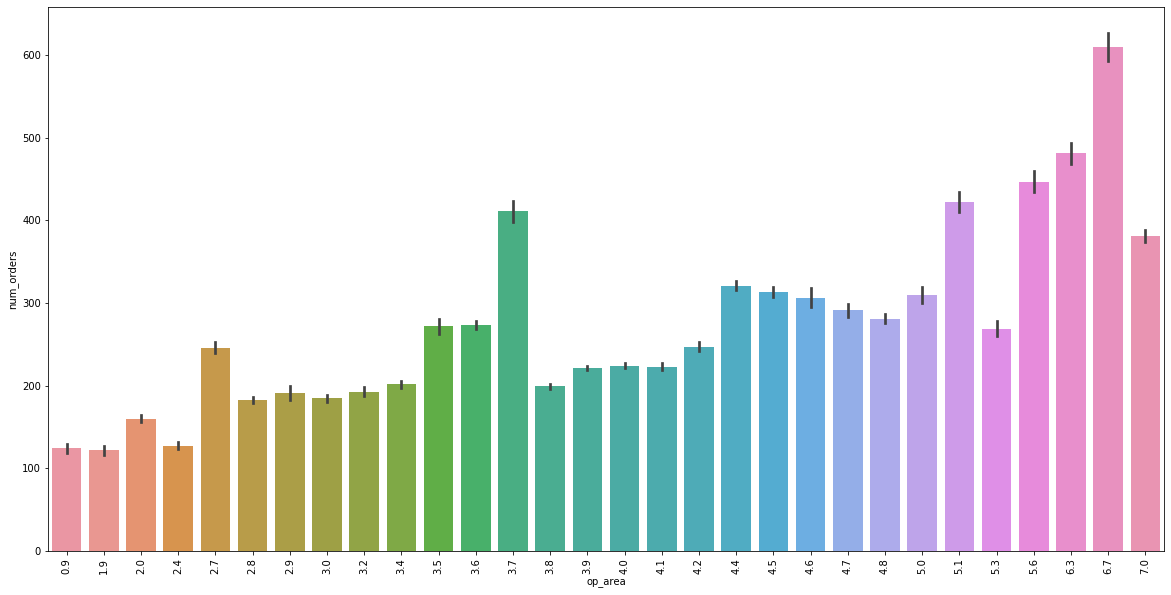

In [38]:
# PLOTTING OP_AREA VS NUM_ORDERS

plt.figure(figsize = (20,10))
sns.barplot(train_data['op_area'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

In [39]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


## 3. Preparing data for models

### 3.1 Handling categorical features which are not being treated as categorical in the dataset

In [40]:
categorical_columns_present_as_numericals = ['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'city_code', 'region_code']
categorical_columns_present_as_text = ['center_type', 'category', 'cuisine']

for column in categorical_columns_present_as_numericals:
    print(column, "contains:", train_data[column].nunique(), "unique values")
    print("-"*50)
for column in categorical_columns_present_as_text:
    print(column, "contains:", train_data[column].nunique(), "unique values")
    print("-"*50)

center_id contains: 77 unique values
--------------------------------------------------
meal_id contains: 51 unique values
--------------------------------------------------
emailer_for_promotion contains: 2 unique values
--------------------------------------------------
homepage_featured contains: 2 unique values
--------------------------------------------------
city_code contains: 51 unique values
--------------------------------------------------
region_code contains: 8 unique values
--------------------------------------------------
center_type contains: 3 unique values
--------------------------------------------------
category contains: 14 unique values
--------------------------------------------------
cuisine contains: 4 unique values
--------------------------------------------------


In [41]:
train_data.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [42]:
# some inherently catgorical colulmns should be categorical but are int64/float64 etc.
# using prepare_data_for_models method to convert these 

In [43]:
#train_data['category'].value_counts()

In [44]:
#train_data['cuisine'].value_counts()

In [45]:
# sorted(train_data['op_area'].unique())
# sorted(test_data['op_area'].unique())

In [46]:
#train_data['center_type'].value_counts()

In [47]:
#train_data['city_code'].value_counts()

In [48]:
#train_data['region_code'].value_counts()

In [49]:
categorical_columns_present_as_numericals

['center_id',
 'meal_id',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code']

In [50]:
categorical_columns_present_as_text

['center_type', 'category', 'cuisine']

In [51]:
# helper function for changing the inherently categorical columns to categories

def prepare_categorial_data_for_models(train_or_test_dataset: pd.DataFrame):
    
    # FOR NUMERICAL CATEGORIES
    for column in categorical_columns_present_as_numericals:
        train_or_test_dataset[column] = train_or_test_dataset[column].astype('category')
    
    # FOR TEXT CATEGORIES
    for column in categorical_columns_present_as_text:
        dummies_for_column = pd.get_dummies(train_or_test_dataset[column], prefix = column)
        train_or_test_dataset[dummies_for_column.columns.values] = dummies_for_column

In [52]:
prepare_categorial_data_for_models(train_data)
prepare_categorial_data_for_models(test_data)
train_data = train_data.drop(columns = categorical_columns_present_as_text)
test_data = test_data.drop(columns = categorical_columns_present_as_text)
print(train_data.shape)
print(test_data.shape)

(456548, 32)
(32573, 31)


In [53]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,55,1885,136.83,0,0,177,647,56,...,0,0,0,0,0,0,0,0,0,1
1,1018704,2,55,1885,135.83,0,0,323,647,56,...,0,0,0,0,0,0,0,0,0,1
2,1196273,3,55,1885,132.92,0,0,96,647,56,...,0,0,0,0,0,0,0,0,0,1
3,1116527,4,55,1885,135.86,0,0,163,647,56,...,0,0,0,0,0,0,0,0,0,1
4,1343872,5,55,1885,146.50,0,0,215,647,56,...,0,0,0,0,0,0,0,0,0,1


In [61]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,55,1885,158.11,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
1,1262649,147,55,1885,159.11,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
2,1453211,149,55,1885,157.14,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
3,1262599,150,55,1885,159.14,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
4,1495848,151,55,1885,160.11,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1


### 3.2 Normalizing the numerical features

* Checkout_price is a numerical feature. So it should be normalized.
* I'll fit a MinMaxScaler() on my train_data's values only and then transform test_data with this scaler, to avoid data leakage.

In [63]:
train_checkout_price = train_data['checkout_price'][:, np.newaxis]
test_checkout_price = test_data['checkout_price'][:, np.newaxis]

In [64]:
# fitting a min-max scaler object on train_data's checkout_price

scaler = MinMaxScaler().fit(train_checkout_price)

In [65]:
# normalizing the checkout_price feature in train data

train_data['checkout_price'] = scaler.transform(train_checkout_price)

# normalizing the checkout_price feature in test data

test_data['checkout_price'] = scaler.transform(test_checkout_price)

In [69]:
# sanity check

train_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,55,1885,0.155056,0,0,177,647,56,...,0,0,0,0,0,0,0,0,0,1
1,1018704,2,55,1885,0.153898,0,0,323,647,56,...,0,0,0,0,0,0,0,0,0,1
2,1196273,3,55,1885,0.150527,0,0,96,647,56,...,0,0,0,0,0,0,0,0,0,1
3,1116527,4,55,1885,0.153933,0,0,163,647,56,...,0,0,0,0,0,0,0,0,0,1
4,1343872,5,55,1885,0.166257,0,0,215,647,56,...,0,0,0,0,0,0,0,0,0,1


In [70]:
# sanity check

test_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,55,1885,0.179706,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
1,1262649,147,55,1885,0.180864,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
2,1453211,149,55,1885,0.178582,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
3,1262599,150,55,1885,0.180899,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
4,1495848,151,55,1885,0.182022,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     32573 non-null  int64   
 1   week                   32573 non-null  int64   
 2   center_id              32573 non-null  category
 3   meal_id                32573 non-null  category
 4   checkout_price         32573 non-null  float64 
 5   emailer_for_promotion  32573 non-null  category
 6   homepage_featured      32573 non-null  category
 7   city_code              32573 non-null  category
 8   region_code            32573 non-null  category
 9   op_area                32573 non-null  float64 
 10  center_type_TYPE_A     32573 non-null  uint8   
 11  center_type_TYPE_B     32573 non-null  uint8   
 12  center_type_TYPE_C     32573 non-null  uint8   
 13  category_Beverages     32573 non-null  uint8   
 14  category_Biryani       32573 non-null 

## > Modeling the data

In [72]:
print(train_data.shape)
print(test_data.shape)

(456548, 32)
(32573, 31)


In [73]:
target_variable = ['num_orders']
variables_to_ignore = ['id']

In [75]:
final_variables = [column for column in train_data.columns if column not in target_variable and column not in variables_to_ignore]

In [78]:
X_train = train_data[final_variables]
y_train = train_data[target_variable]

# test
X_test = test_data[final_variables]

In [80]:
# performing a sanity check 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(456548, 30)
(456548, 1)
(32573, 30)


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, test_size=0.1, random_state = 42)

In [81]:
lr = LinearRegression().fit(X_train, y_train)

In [82]:
lr.score(X_train, y_train)

0.4105249262570575

In [102]:
y_pred = abs(lr.predict(X_test))

In [85]:
# on train data
mean_squared_log_error(y_train, abs(lr.predict(X_train)))

1.0309162582105103

In [86]:
s = pd.read_csv('sample_submission_hSlSoT6.csv.xls')
s.head()

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


In [91]:
test_data['id'].shape

(32573,)

In [105]:
y_pred.ravel()

array([327.98177755, 327.32914036, 328.15195611, ...,  50.81897253,
        50.70237819,  49.93314668])

In [106]:
submission_file_two = pd.DataFrame({'id': test_data['id'], 'num_orders': y_pred.ravel()})
submission_file_two.head()

,id,num_orders
0,1028232,327.981778
1,1262649,327.329140
2,1453211,328.151956
3,1262599,326.963276
4,1495848,326.326720


In [107]:
submission_file_two.to_csv('submission_file_two.csv', index=False)

In [108]:
my_submission = pd.read_csv('submission_file_two.csv')
my_submission.head()

,id,num_orders
0,1028232,327.981778
1,1262649,327.329140
2,1453211,328.151956
3,1262599,326.963276
4,1495848,326.326720
